<a href="https://colab.research.google.com/github/thopiyawan/dl-nll_pj/blob/main/62199130237_Image_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Preparation
- upload images on google drive

In [105]:
#import tensorflow และ library อื่นๆที่จำเป็นมา
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [106]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [107]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [108]:
import pathlib
path = "2020-lecture/DS 521 nn & dl/project_img/foods_dataset" #ที่อยู่ของข้อมูล
data_dir = pathlib.Path(path)
image_count = len(list(data_dir.glob('*/*.jpg')))

#เช็คจำนวนรูปภาพที่จะทำ Train 
print(image_count)


5000


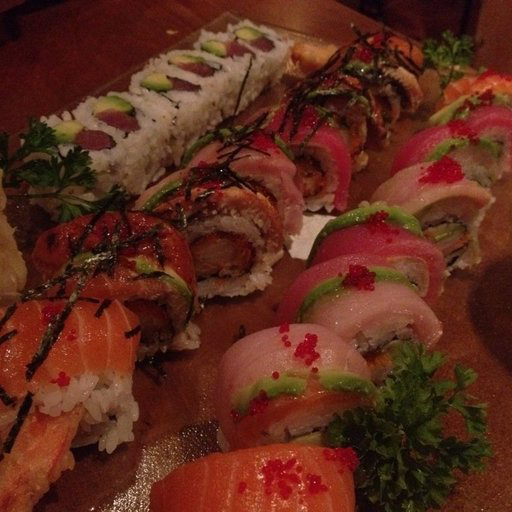

In [109]:
# เรียกดูตัวอย่างภาพ Apple ที่เราจะทำการ Train
sushi = list(data_dir.glob('sushi/*'))
PIL.Image.open(str(sushi[1]))

In [110]:
#กำหนด Dataset ของข้อมูลที่จะ Train
batch_size = 16
img_height = 180
img_width = 180

In [111]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 5000 files belonging to 5 classes.
Using 4000 files for training.
Found 5000 files belonging to 5 classes.
Using 1000 files for validation.


In [112]:
class_names = train_ds.class_names
print(class_names)

['fried_rice', 'pad_thai', 'ramen', 'sushi', 'waffles']


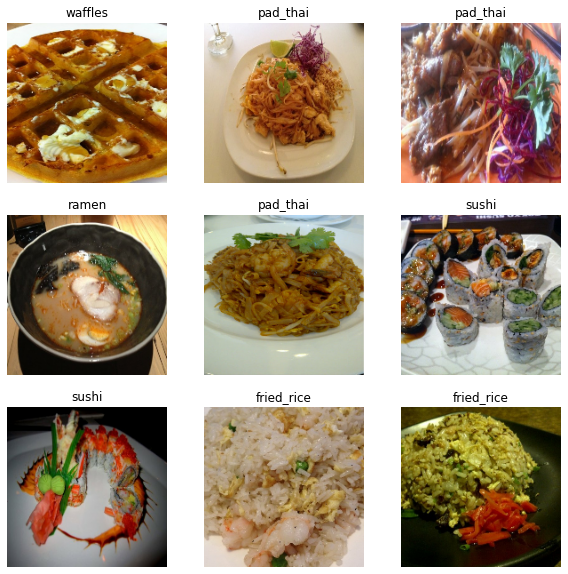

In [113]:
plt.figure(figsize=(10, 10)) #ขนาดของรูปภาพที่จะให้แสดง
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [114]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [118]:
num_classes = 5
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [120]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_11 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 22, 22, 64)       

In [121]:
epochs=10
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
250/250 [==============================] - 3440s 14s/step - loss: 1.4815 - accuracy: 0.3587 - val_loss: 1.3337 - val_accuracy: 0.4600
Epoch 2/10
250/250 [==============================] - 137s 550ms/step - loss: 1.2346 - accuracy: 0.4940 - val_loss: 1.2331 - val_accuracy: 0.5080
Epoch 3/10
250/250 [==============================] - 137s 550ms/step - loss: 0.9883 - accuracy: 0.6190 - val_loss: 1.1938 - val_accuracy: 0.5470
Epoch 4/10
250/250 [==============================] - 138s 553ms/step - loss: 0.6945 - accuracy: 0.7510 - val_loss: 1.5089 - val_accuracy: 0.5040
Epoch 5/10
250/250 [==============================] - 141s 562ms/step - loss: 0.4030 - accuracy: 0.8565 - val_loss: 2.2980 - val_accuracy: 0.4690
Epoch 6/10
250/250 [==============================] - 139s 555ms/step - loss: 0.1981 - accuracy: 0.9335 - val_loss: 2.1174 - val_accuracy: 0.5120
Epoch 7/10
250/250 [==============================] - 138s 551ms/step - loss: 0.1233 - accuracy: 0.9567 - val_loss: 2.6806 - 

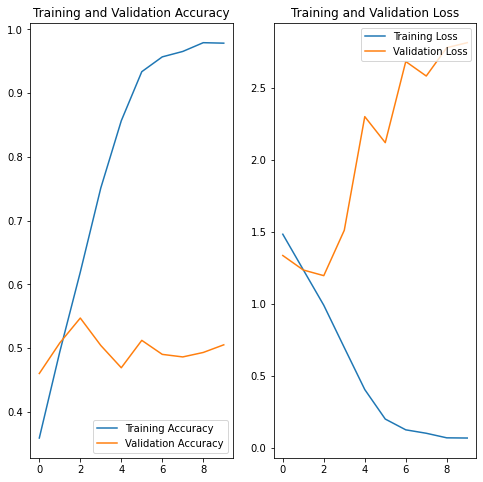

In [122]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


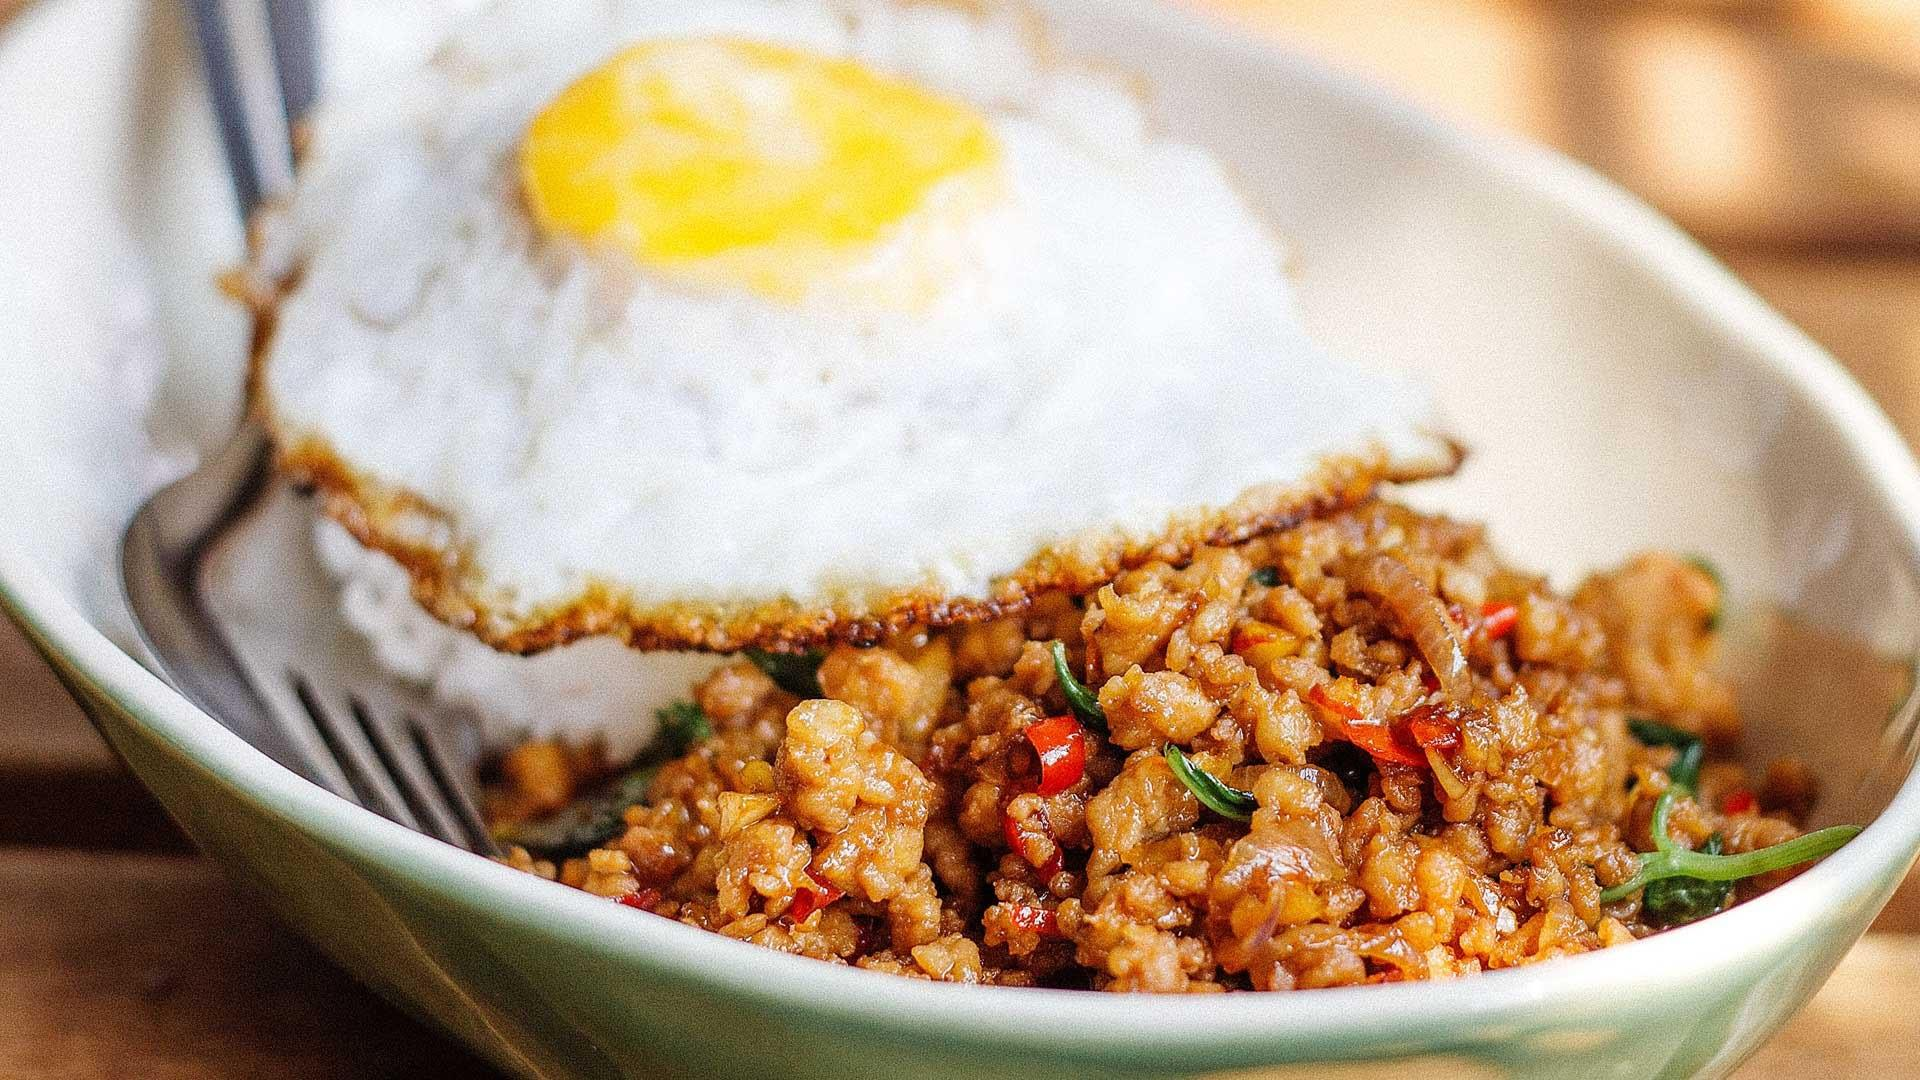

this image most likely belongs to fried_rice with a 98.50 percent confidence


In [123]:
#prediction

path = "2020-lecture/DS 521 nn & dl/project_img/test_data/kp1.jpg" #ที่อยู่ของข้อมูล
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_arr = keras.preprocessing.image.img_to_array(img)
img_arr = tf.expand_dims(img_arr,0)
predictions = model.predict(img_arr)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("this image most likely belongs to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100*np.max(score)))

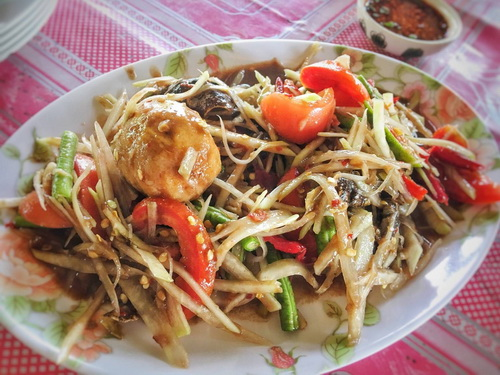

this image most likely belongs to waffles with a 81.16 percent confidence


In [124]:
path = "2020-lecture/DS 521 nn & dl/project_img/test_data/st1.jpg" #ที่อยู่ของข้อมูล
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_arr = keras.preprocessing.image.img_to_array(img)
img_arr = tf.expand_dims(img_arr,0)
predictions = model.predict(img_arr)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("this image most likely belongs to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100*np.max(score)))

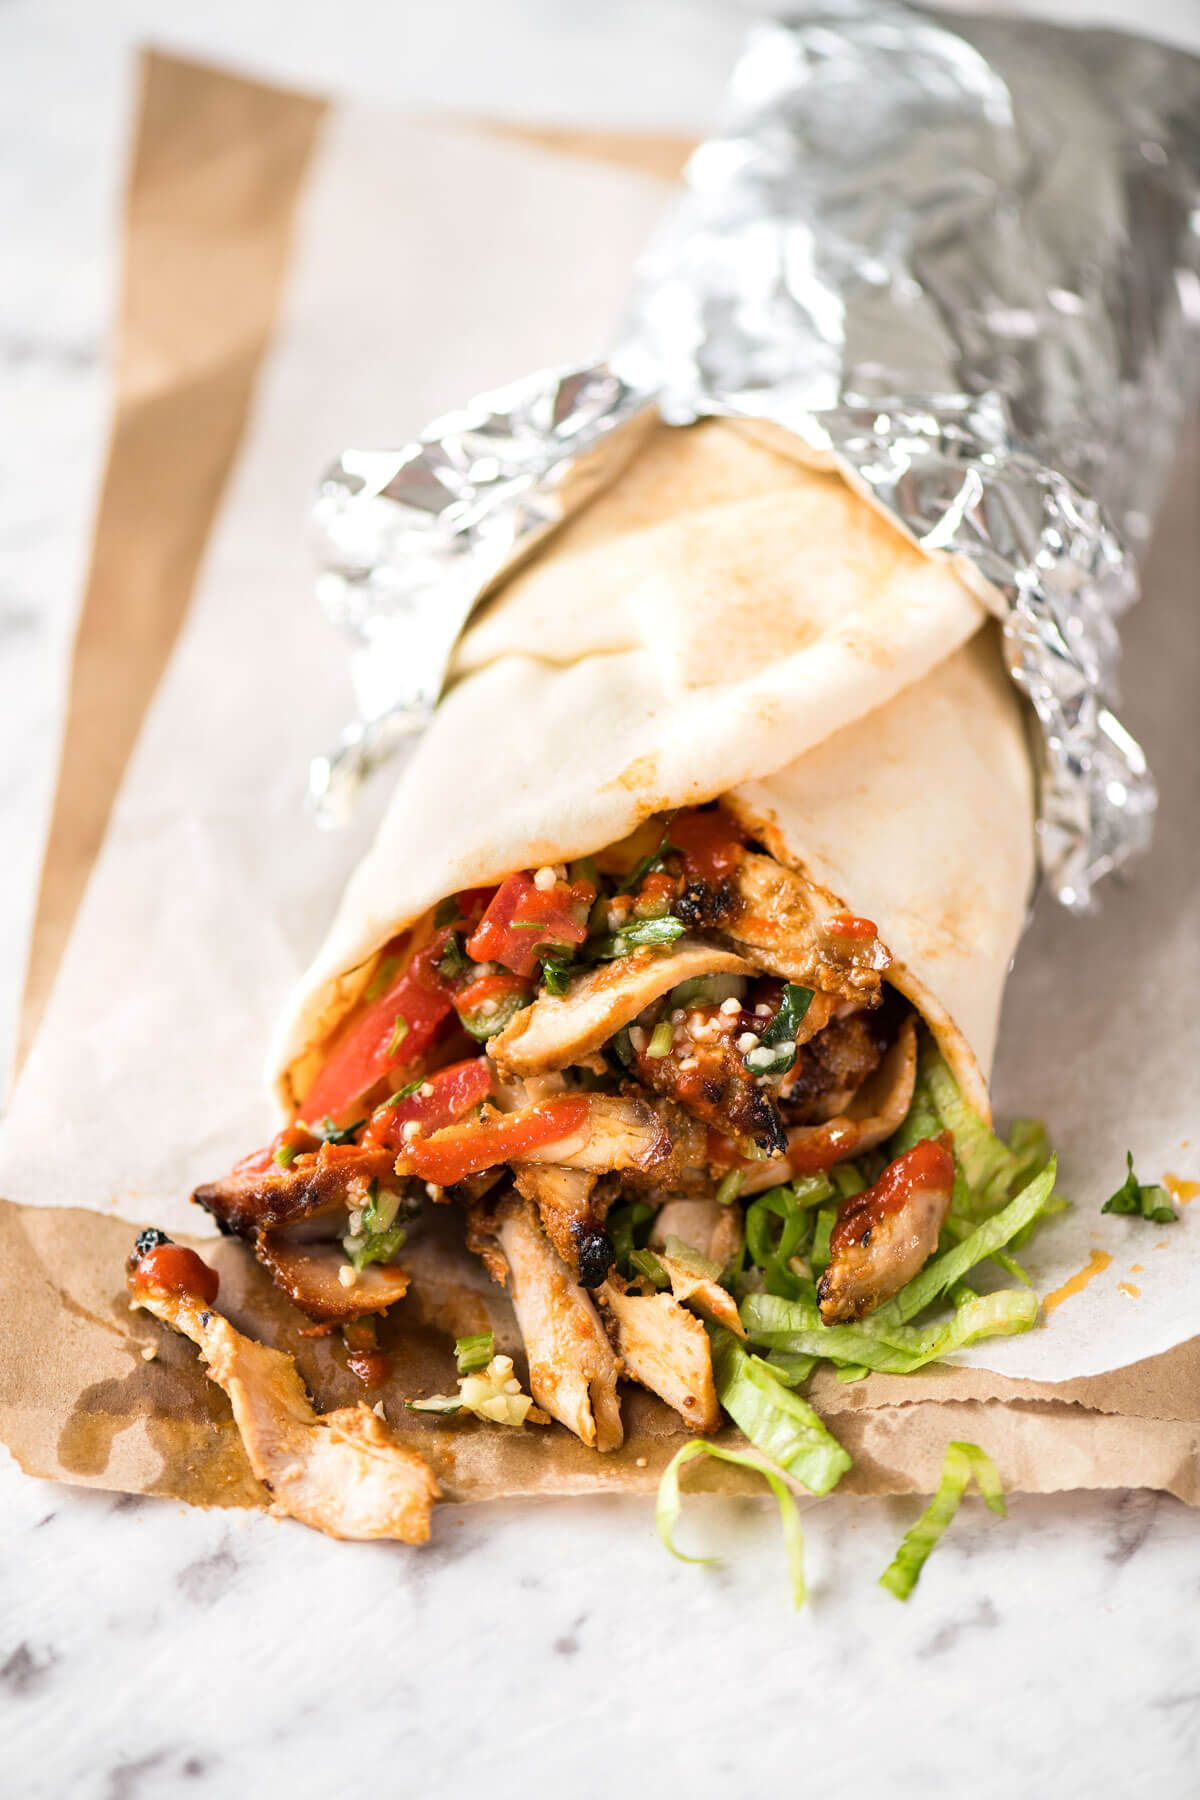

this image most likely belongs to pad_thai with a 90.27 percent confidence


In [125]:
path = "2020-lecture/DS 521 nn & dl/project_img/test_data/kb1.jpg" #ที่อยู่ของข้อมูล
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_arr = keras.preprocessing.image.img_to_array(img)
img_arr = tf.expand_dims(img_arr,0)
predictions = model.predict(img_arr)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("this image most likely belongs to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100*np.max(score)))

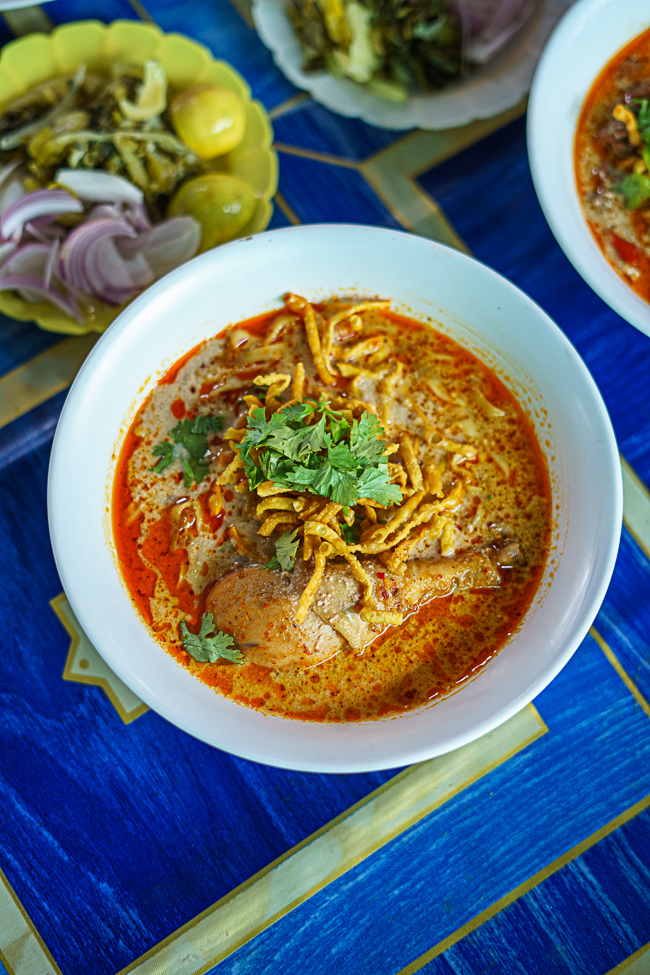

this image most likely belongs to ramen with a 74.21 percent confidence


In [126]:
path = "2020-lecture/DS 521 nn & dl/project_img/test_data/ks1.jpg" #ที่อยู่ของข้อมูล
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_arr = keras.preprocessing.image.img_to_array(img)
img_arr = tf.expand_dims(img_arr,0)
predictions = model.predict(img_arr)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("this image most likely belongs to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100*np.max(score)))

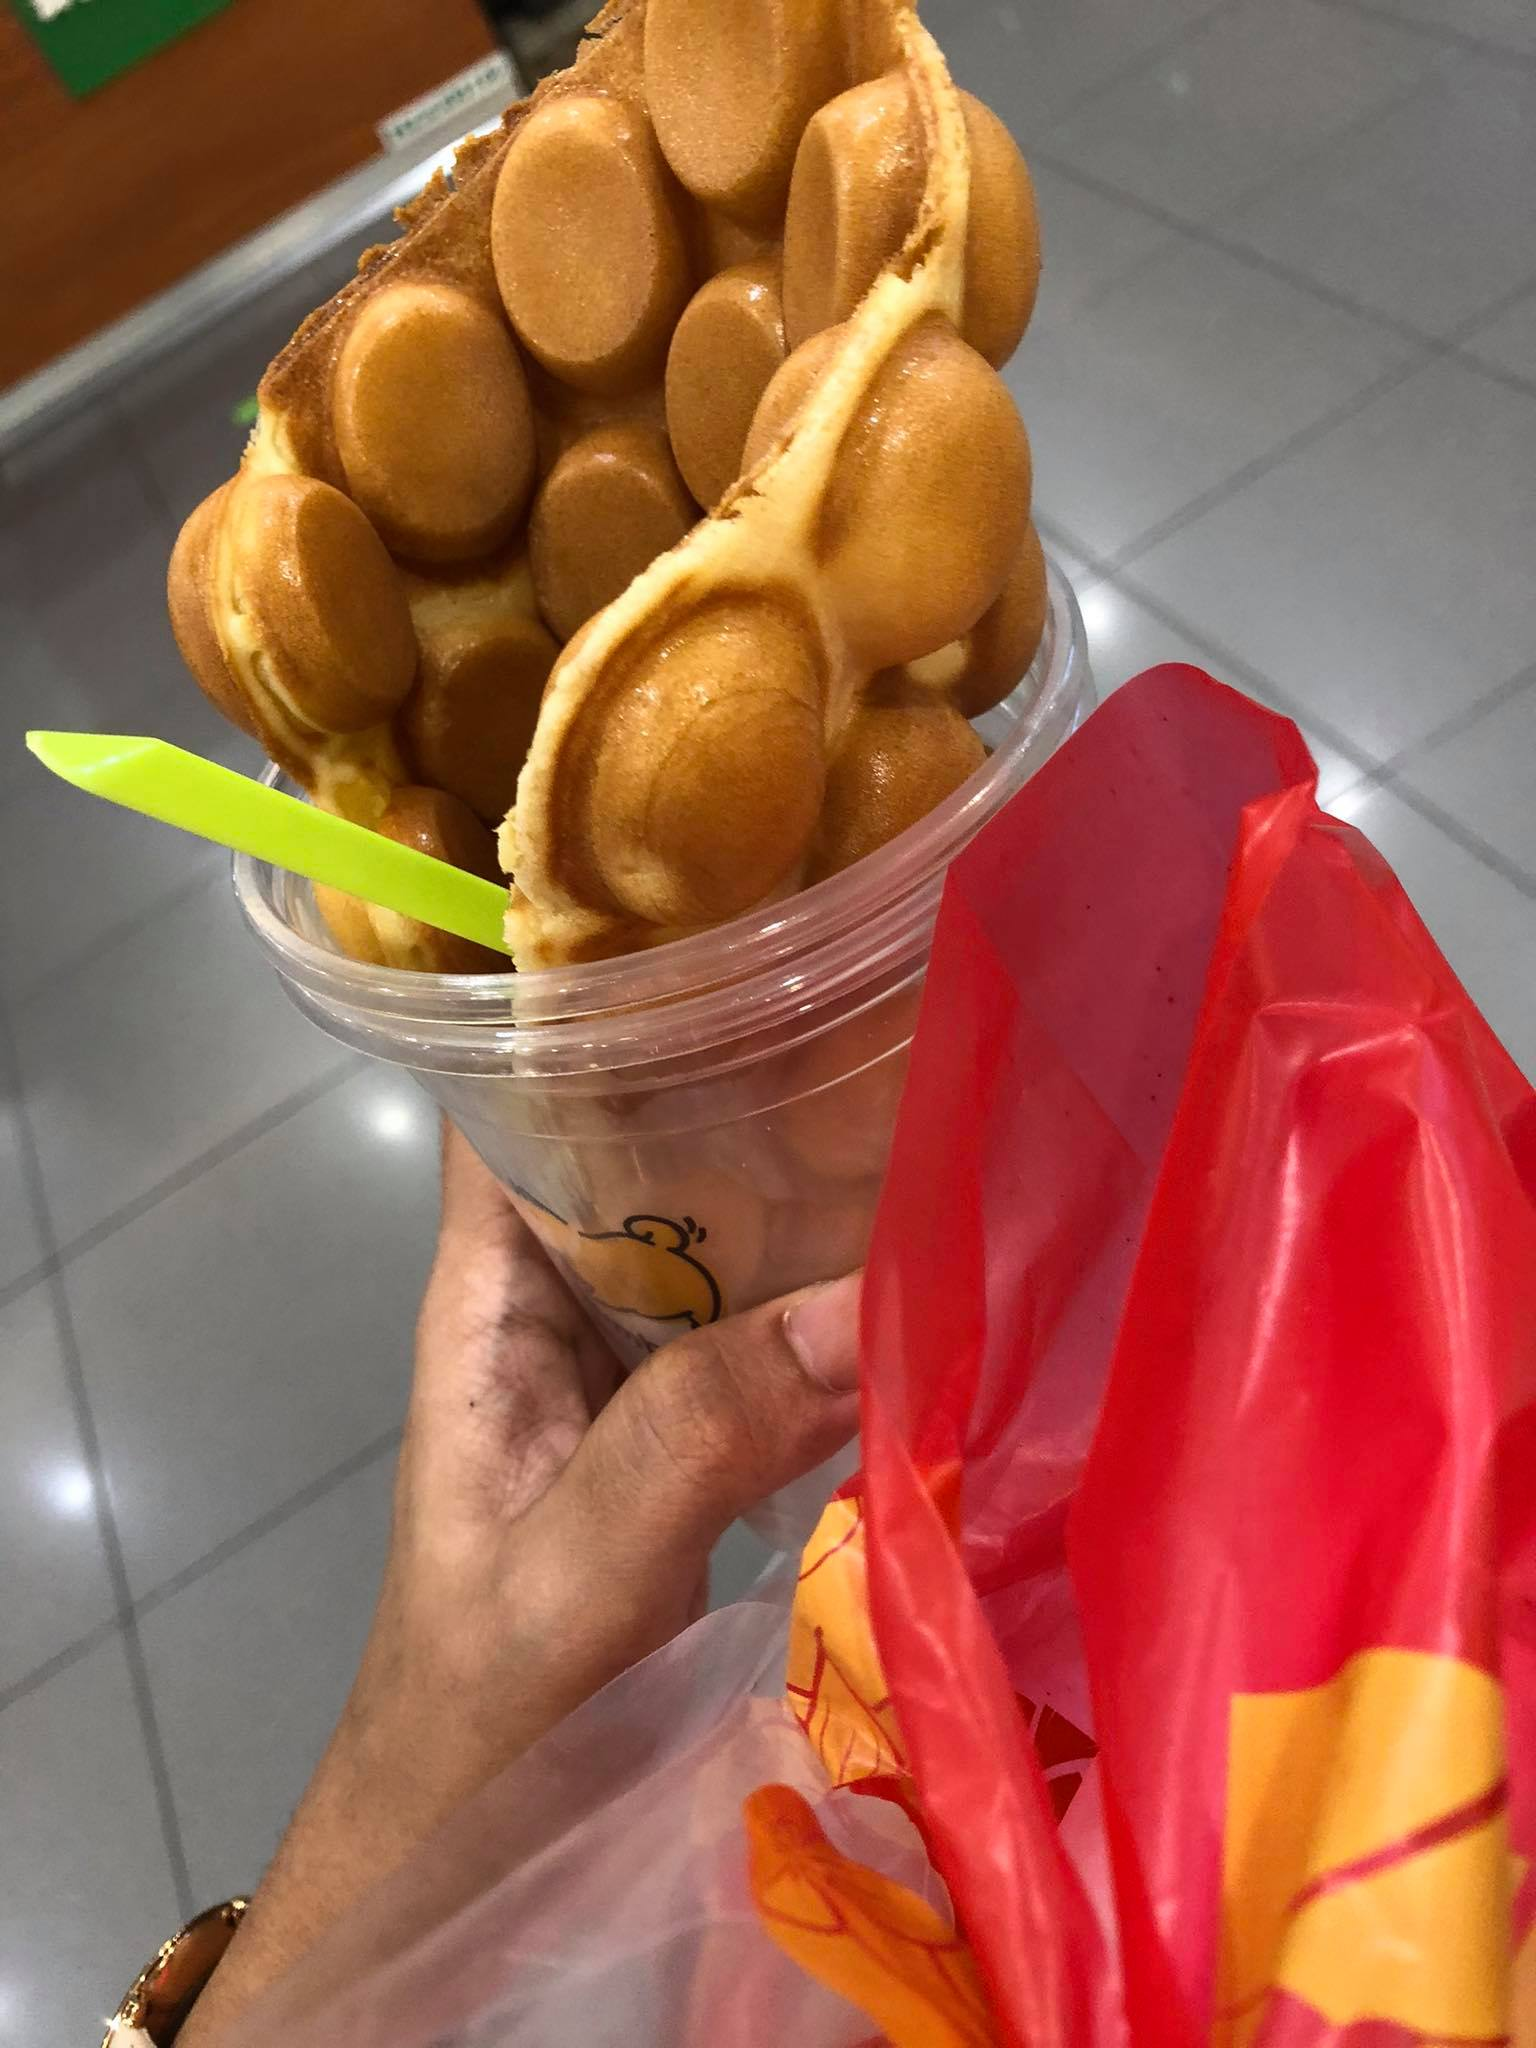

this image most likely belongs to sushi with a 99.31 percent confidence


In [129]:
path = "2020-lecture/DS 521 nn & dl/project_img/test_data/test_1.jpg" #ที่อยู่ของข้อมูล
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_arr = keras.preprocessing.image.img_to_array(img)
img_arr = tf.expand_dims(img_arr,0)
predictions = model.predict(img_arr)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("this image most likely belongs to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100*np.max(score)))

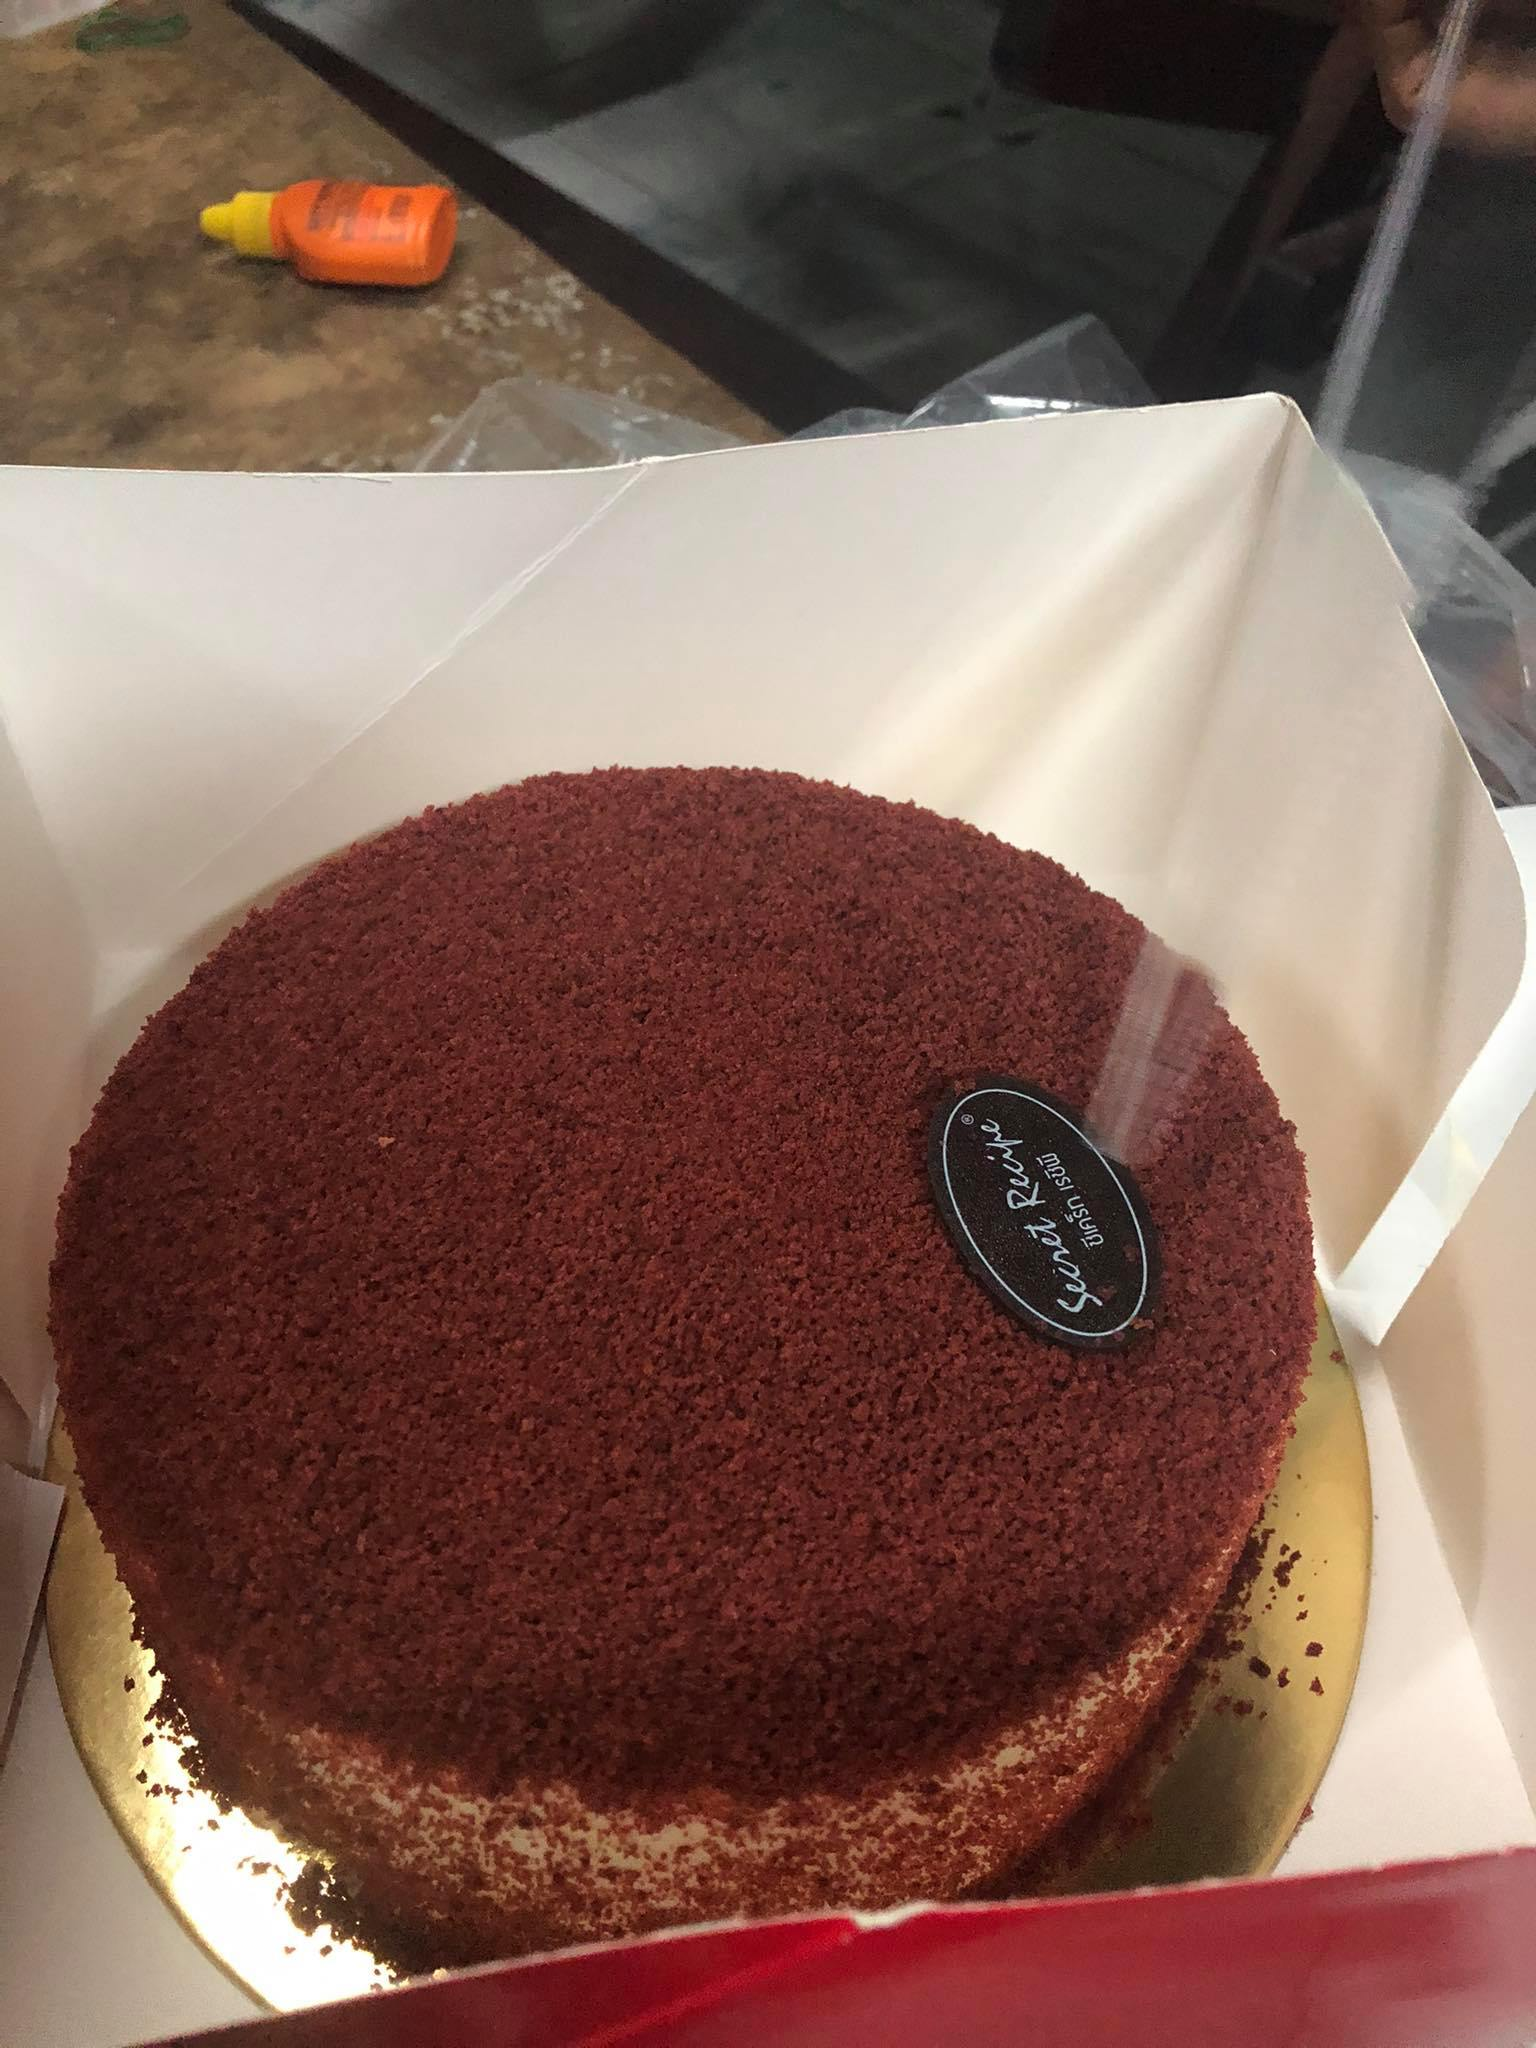

this image most likely belongs to sushi with a 92.35 percent confidence


In [131]:
path = "2020-lecture/DS 521 nn & dl/project_img/test_data/test_2.jpg" #ที่อยู่ของข้อมูล
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_arr = keras.preprocessing.image.img_to_array(img)
img_arr = tf.expand_dims(img_arr,0)
predictions = model.predict(img_arr)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("this image most likely belongs to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100*np.max(score)))

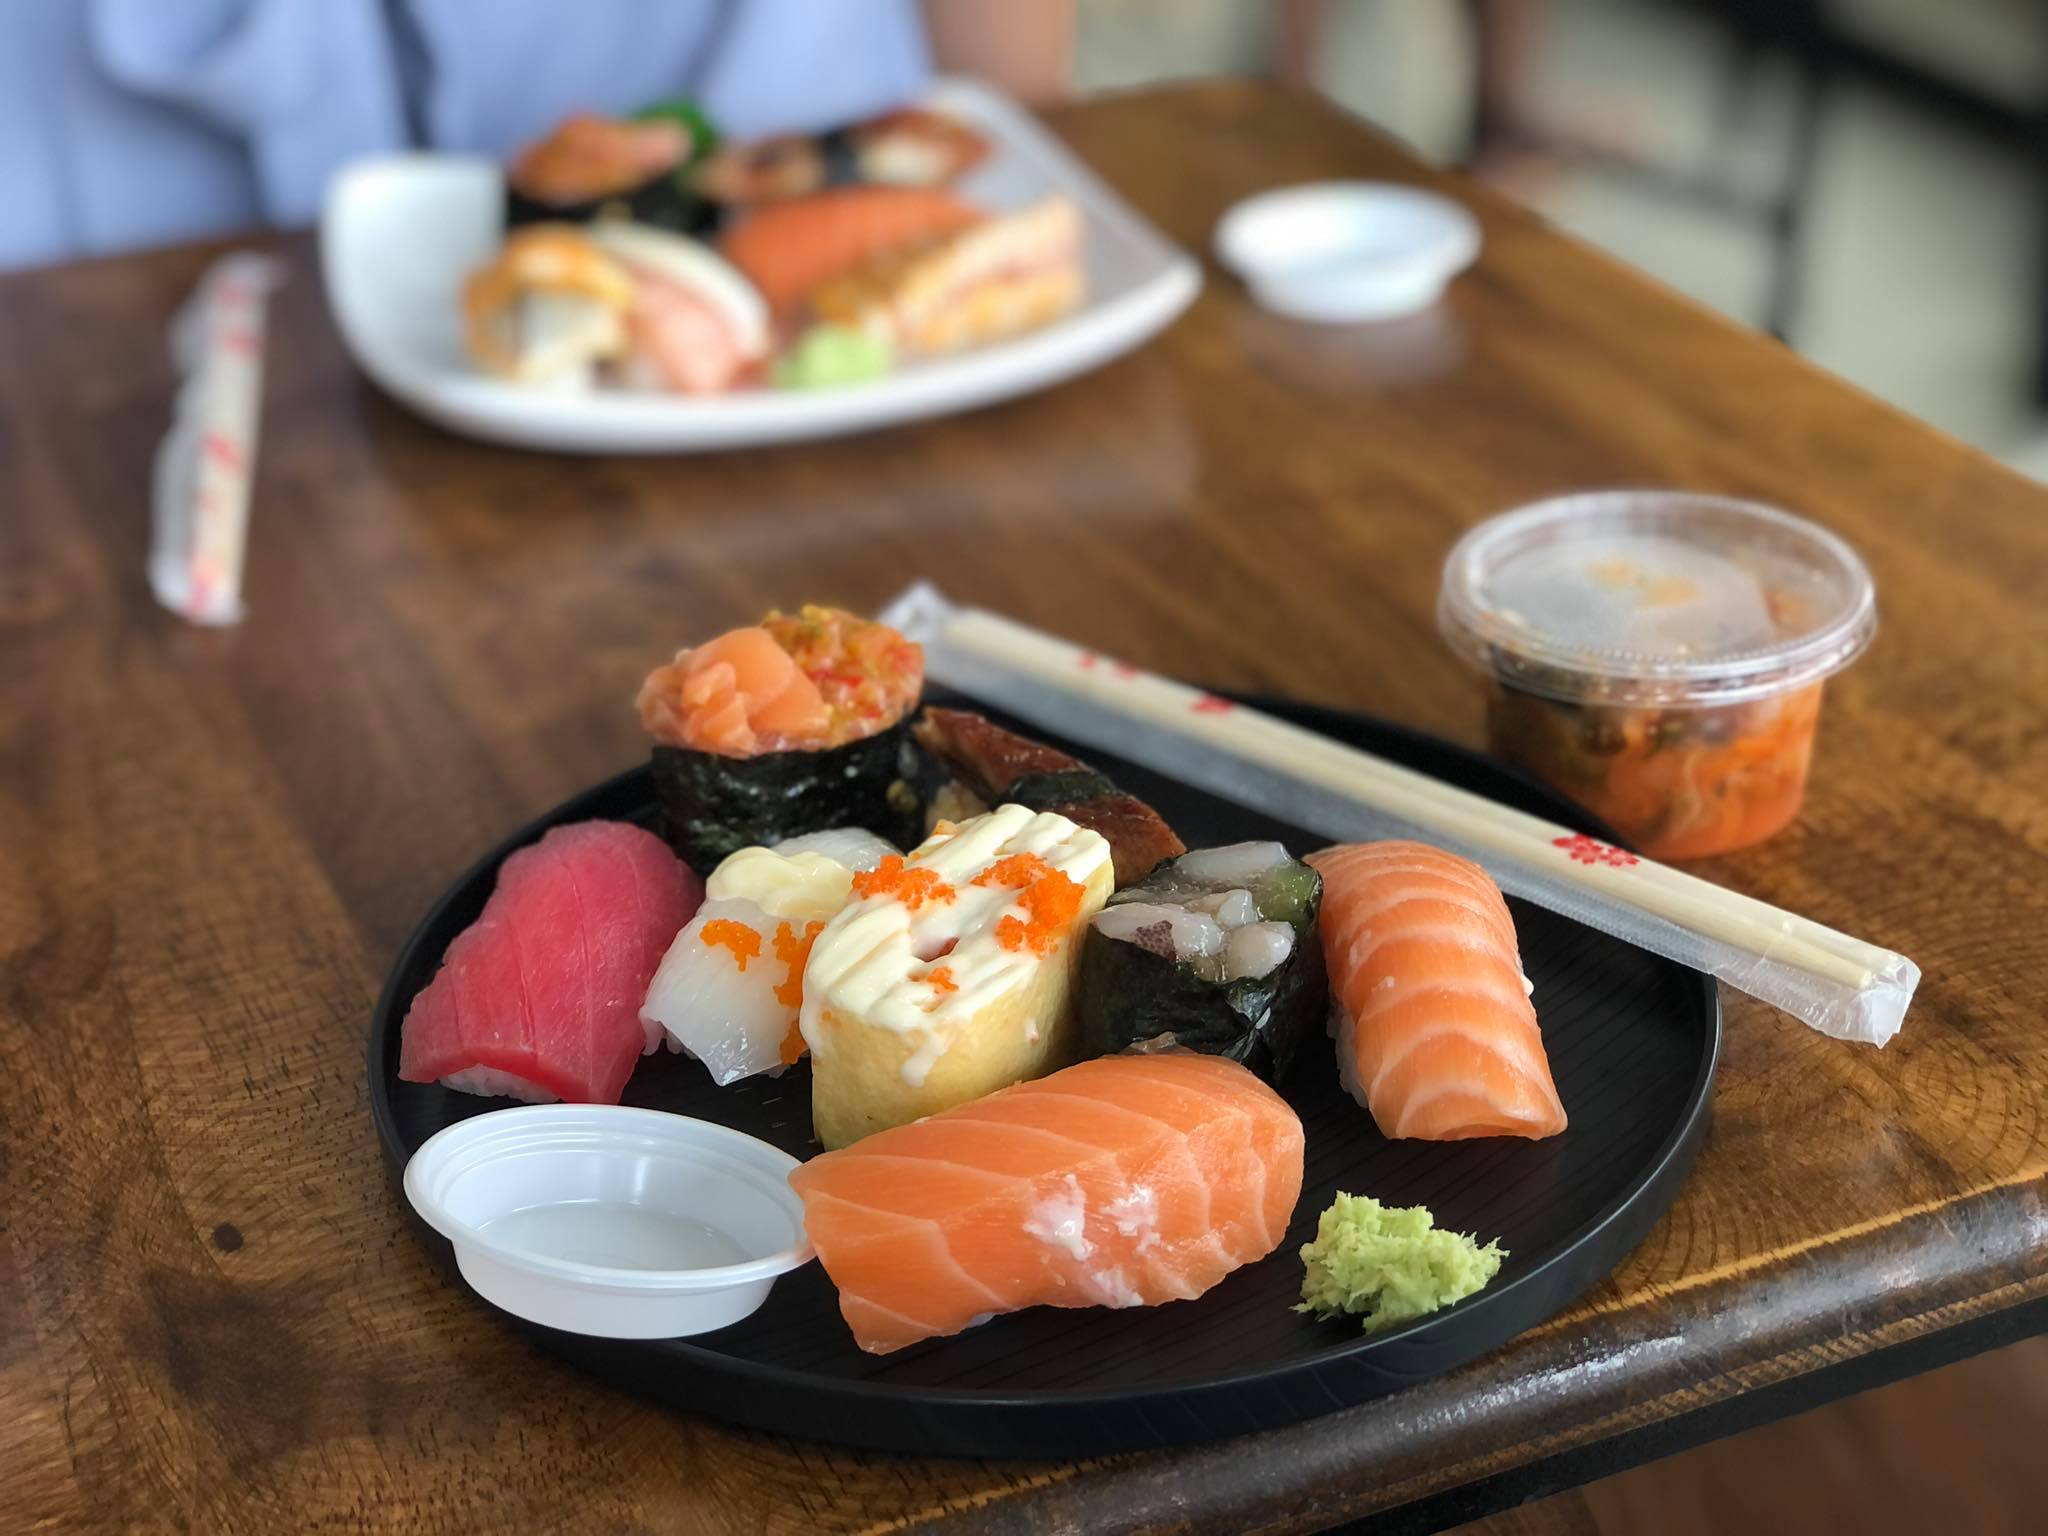

this image most likely belongs to waffles with a 94.24 percent confidence


In [132]:
path = "2020-lecture/DS 521 nn & dl/project_img/test_data/test_3.jpg" #ที่อยู่ของข้อมูล
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_arr = keras.preprocessing.image.img_to_array(img)
img_arr = tf.expand_dims(img_arr,0)
predictions = model.predict(img_arr)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("this image most likely belongs to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100*np.max(score)))

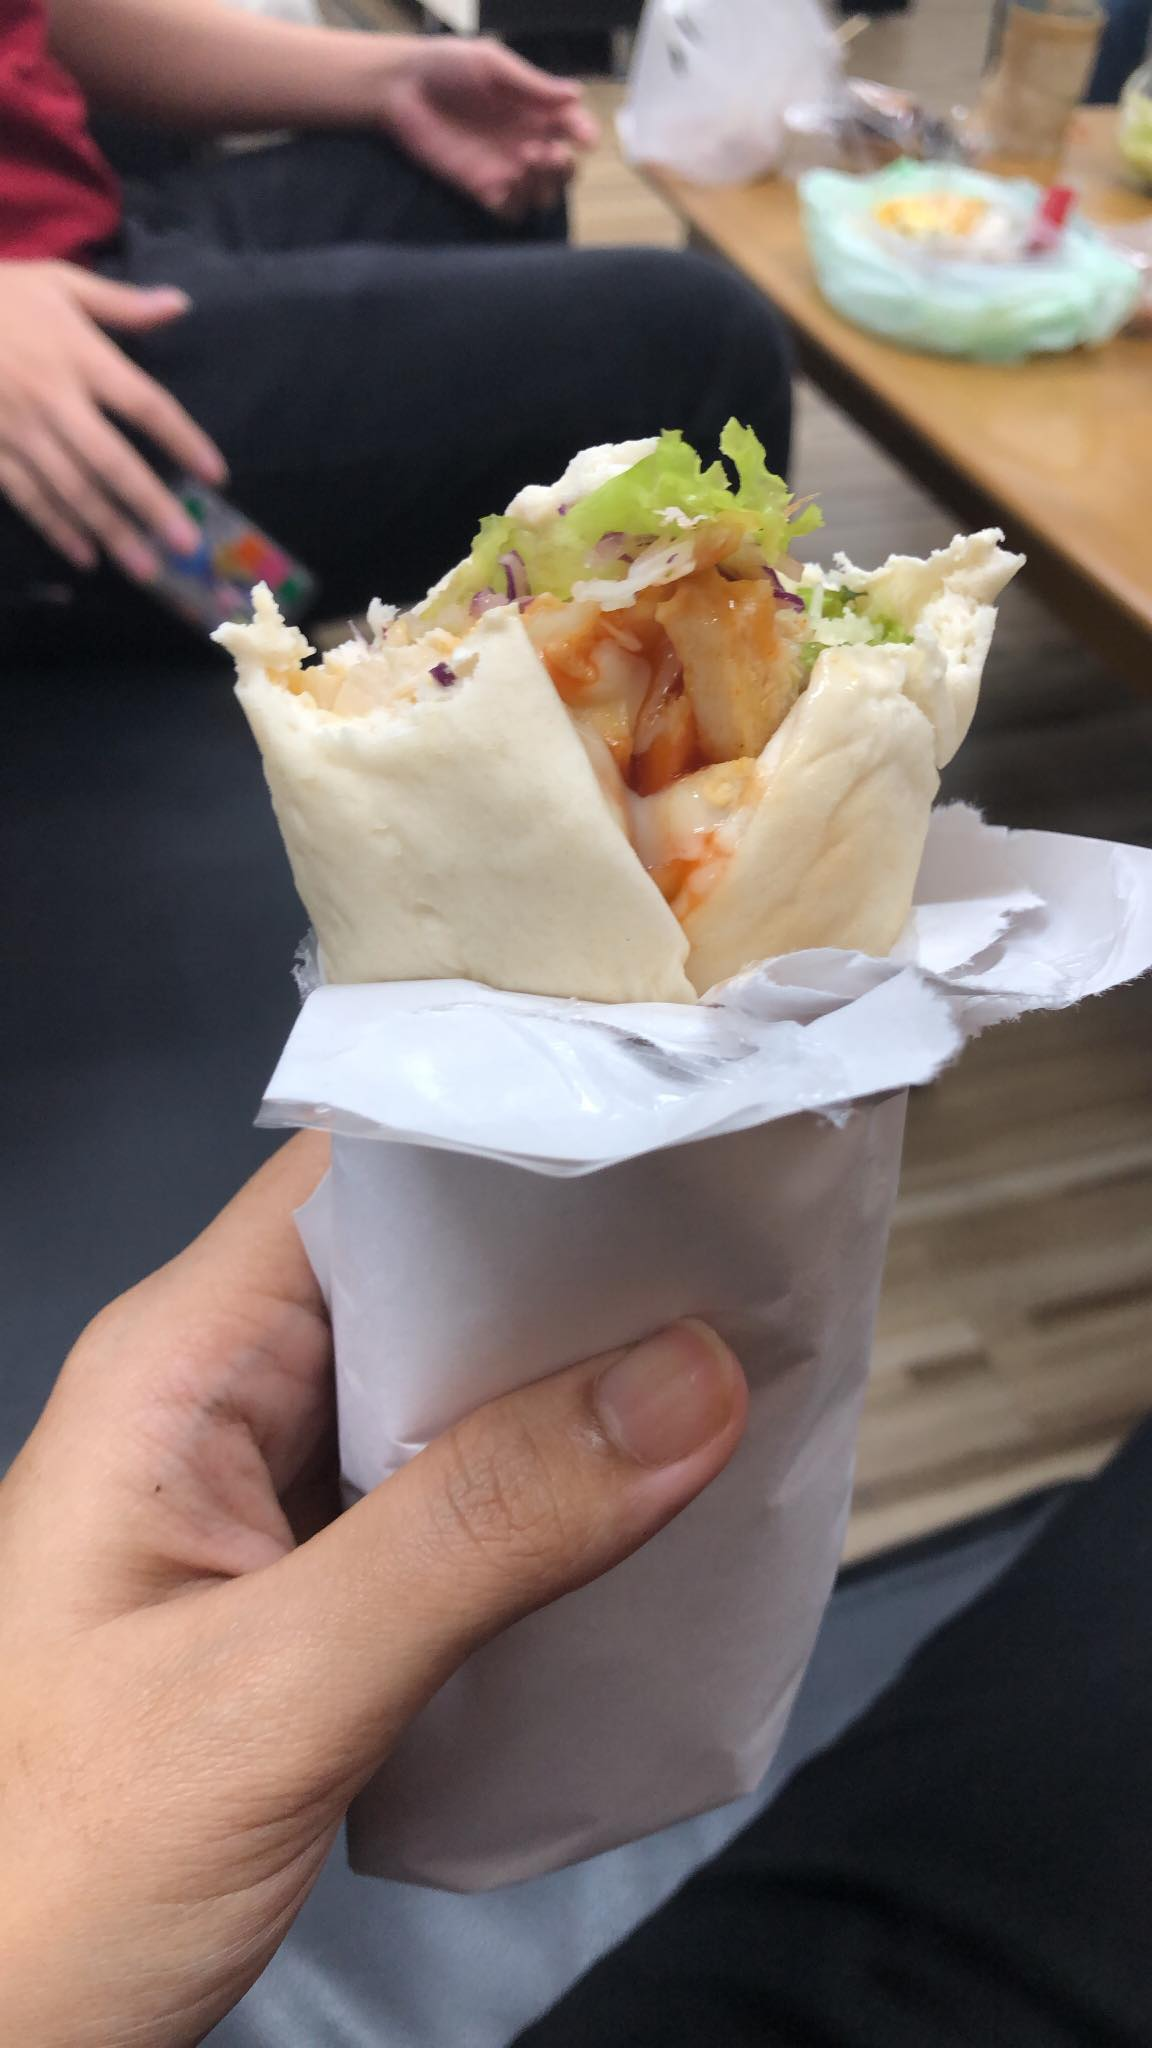

this image most likely belongs to sushi with a 90.60 percent confidence


In [133]:
path = "2020-lecture/DS 521 nn & dl/project_img/test_data/test_4.jpg" #ที่อยู่ของข้อมูล
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_arr = keras.preprocessing.image.img_to_array(img)
img_arr = tf.expand_dims(img_arr,0)
predictions = model.predict(img_arr)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("this image most likely belongs to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100*np.max(score)))

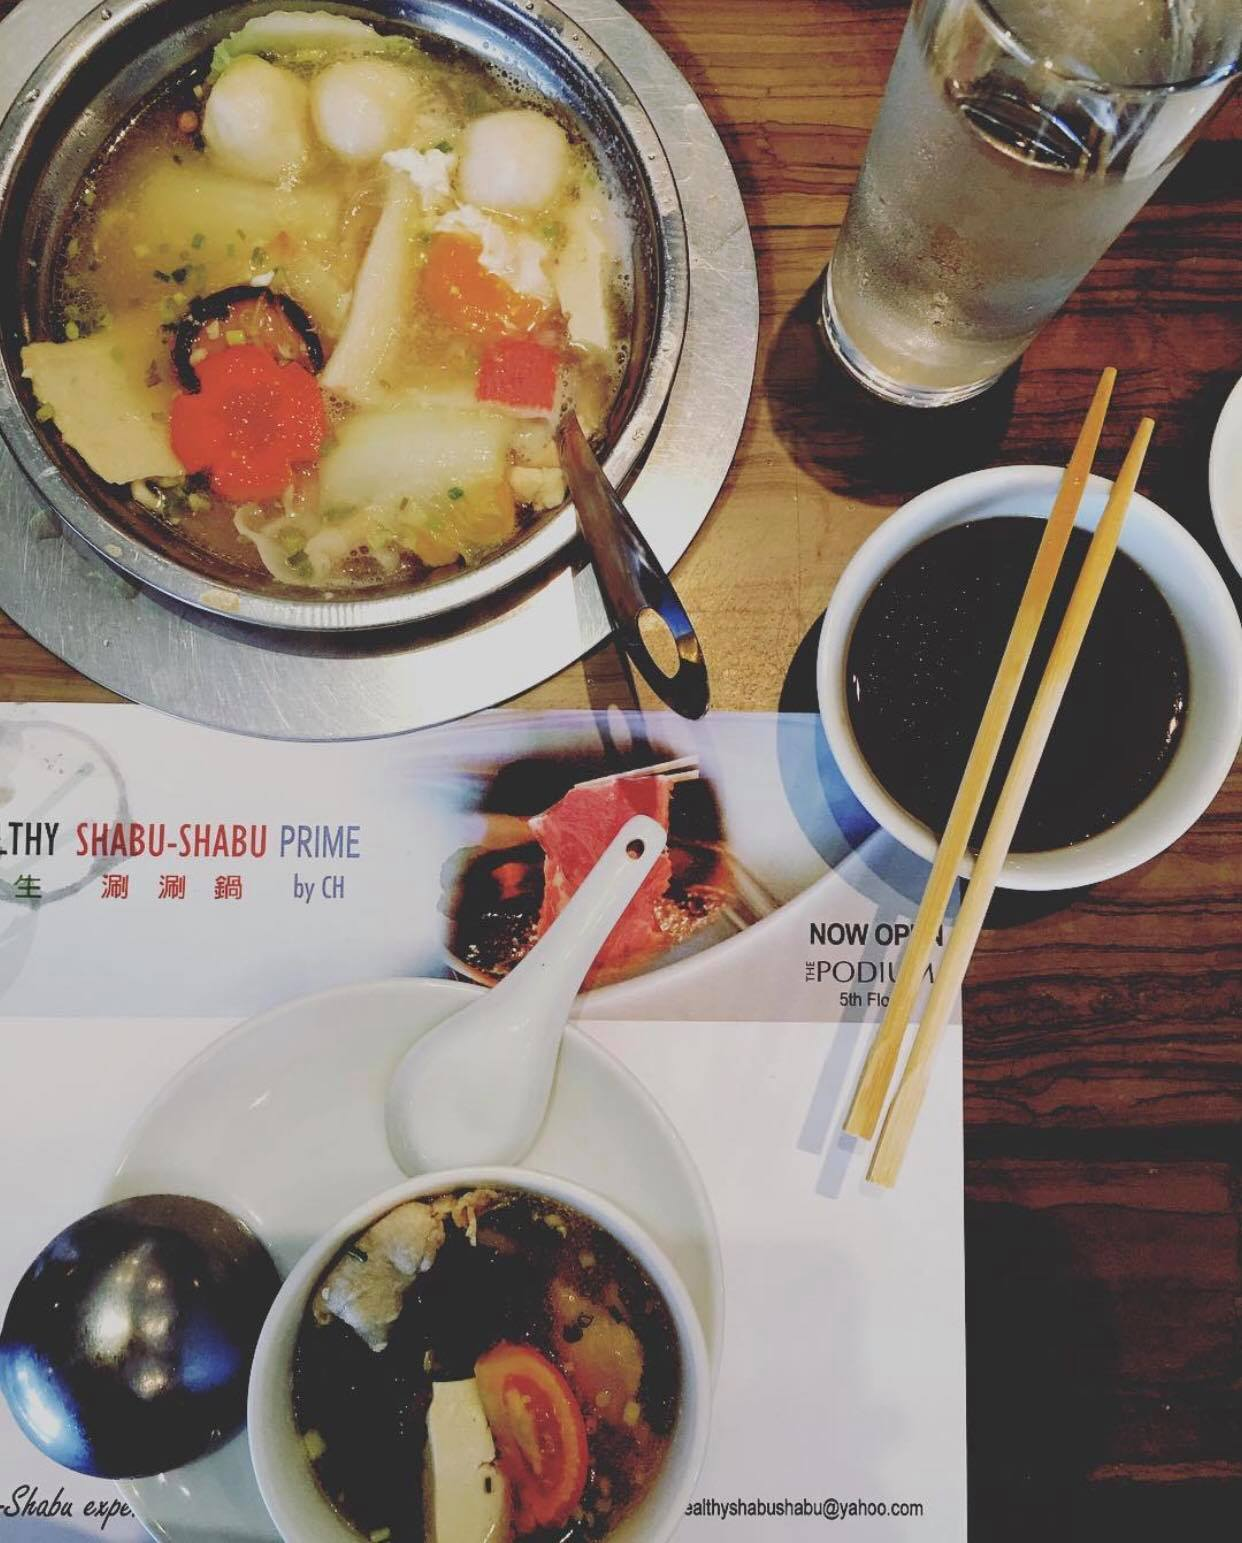

this image most likely belongs to sushi with a 100.00 percent confidence


In [134]:
path = "2020-lecture/DS 521 nn & dl/project_img/test_data/test_5.jpg" #ที่อยู่ของข้อมูล
img = keras.preprocessing.image.load_img(path, target_size=(img_height, img_width))
img_arr = keras.preprocessing.image.img_to_array(img)
img_arr = tf.expand_dims(img_arr,0)
predictions = model.predict(img_arr)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print("this image most likely belongs to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100*np.max(score)))